<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("C:\\Users\jakub\Desktop\Projekty\IBM Data Analyst Capstone Project\survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


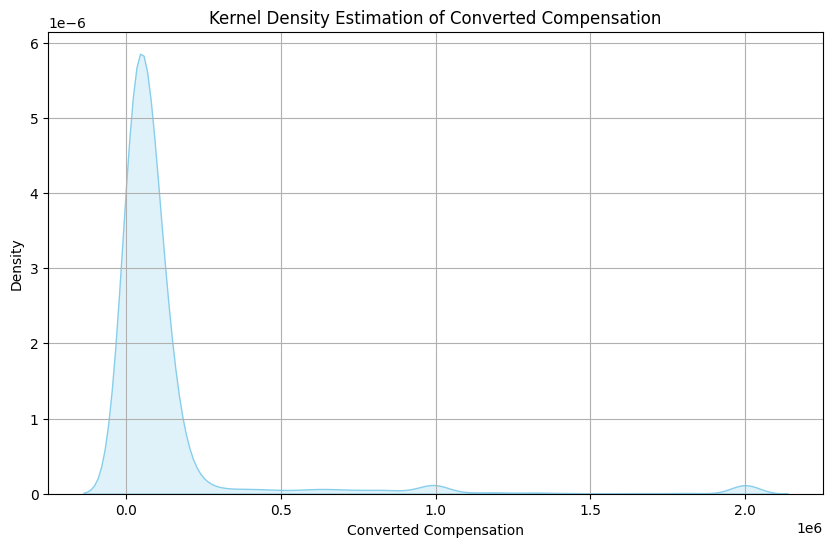

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

plt.figure(figsize=(10, 6))
sns.kdeplot(df["ConvertedComp"], fill=True, color="skyblue")
plt.title('Kernel Density Estimation of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


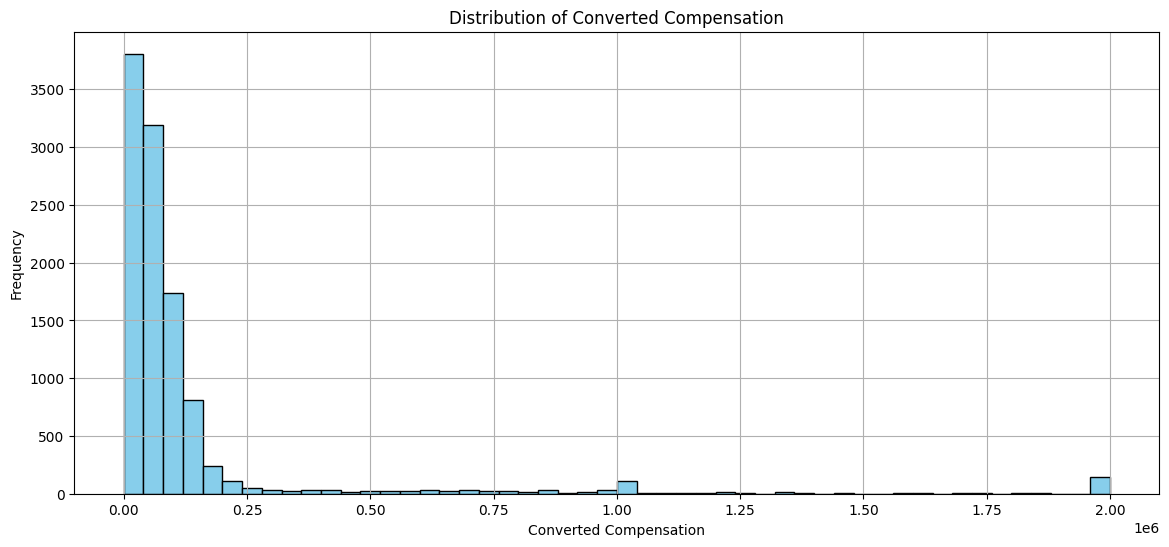

In [4]:
# your code goes here

plt.figure(figsize=(14, 6))
plt.hist(df["ConvertedComp"], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
df["ConvertedComp"].median()

57744.0

In [6]:
df["Age"].median()

29.0

In [7]:
df["Gender"].value_counts()

Gender
Man                                                            10626
Woman                                                            737
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

How many responders identified themselves only as a **Man**?


In [8]:
# Assuming 'Gender' is the column name you want to filter
# Replace 'df' with your actual DataFrame name if it's different
print("Men:",(df["Gender"] == "Man").sum())
print("Women:",(df["Gender"] == "Woman").sum())


Men: 10626
Women: 737


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# your code goes here
# Assuming 'df' is your DataFrame
# Replace 'df' with your actual DataFrame name if it's different

# Calculate and directly print the median ConvertedComp for responders identified only as Woman
print(df[df["Gender"] == "Woman"]["ConvertedComp"].median())

57636.0


In [10]:
# Assuming 'df' is your DataFrame
# Replace 'df' with your actual DataFrame name if it's different

# Filter the DataFrame for rows where the 'Gender' column is 'Woman'
woman_data = df[df['Gender'] == 'Woman']

# Calculate the median of the 'ConvertedComp' column for the filtered data
median_converted_comp = woman_data['ConvertedComp'].median()

# Print the median ConvertedComp for respondents who identified themselves as 'Woman'
print("Median ConvertedComp for respondents who identified as 'Woman':", median_converted_comp)


Median ConvertedComp for respondents who identified as 'Woman': 57636.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# your code goes here
df["Age"].describe()

count    11255.000000
mean        30.772394
std          7.392780
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


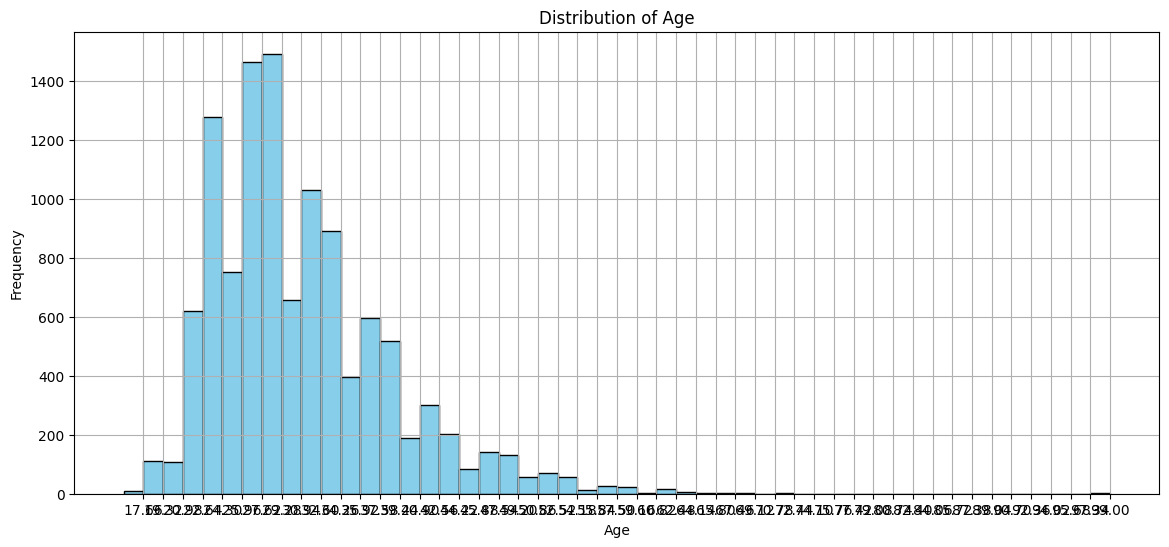

In [12]:
import matplotlib.pyplot as plt

# Your code for plotting the histogram
plt.figure(figsize=(14, 6))
hist, bins, _ = plt.hist(df["Age"], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Set x-ticks to the right edge of each bin
plt.xticks(bins[1:])

plt.show()

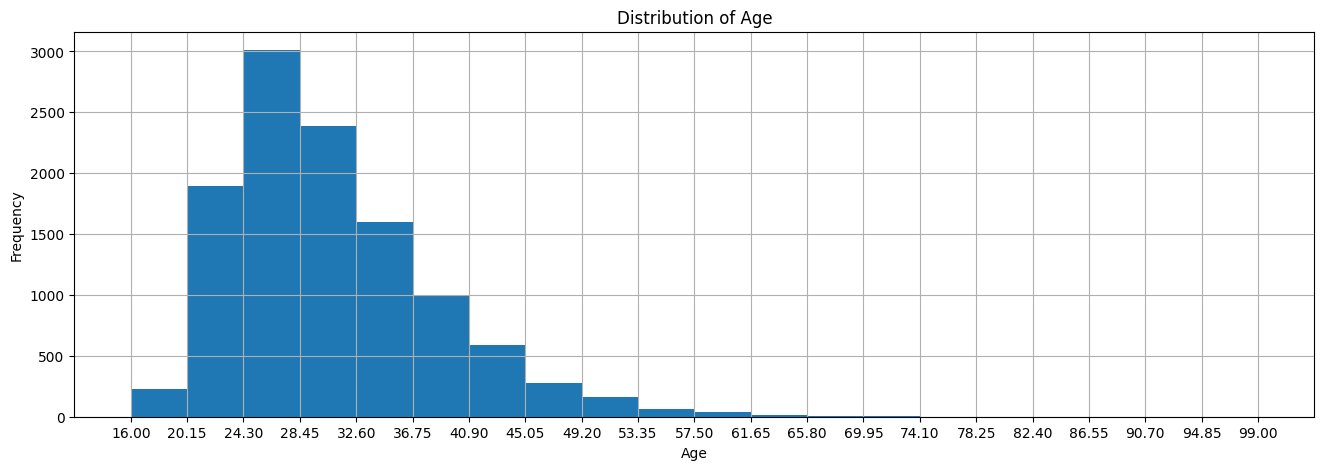

In [13]:
# Specify the number of bins
import numpy as np
age_data = df["Age"].dropna()
num_bins = 20

# Calculate the histogram
count, bin_edges = np.histogram(age_data, bins=num_bins)

# Plot the histogram
age_data.plot(kind='hist', figsize=(16, 5), bins=num_bins, xticks=bin_edges)

# Add title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [14]:
df["ConvertedComp"].describe()

count    1.073000e+04
mean     1.313340e+05
std      2.943245e+05
min      0.000000e+00
25%      2.672700e+04
50%      5.774400e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

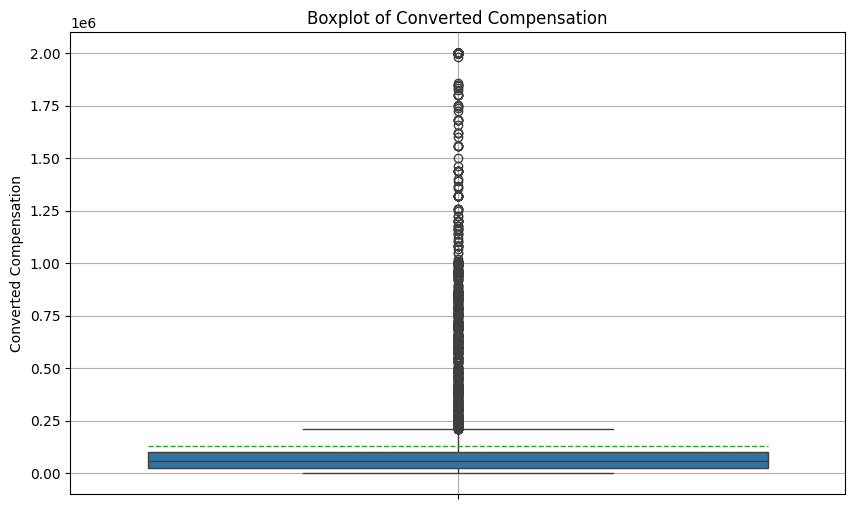

In [15]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'df' with your actual DataFrame name if it's different

# Create a box plot with additional information
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y="ConvertedComp", showmeans=True, meanline=True, showcaps=True, showbox=True, showfliers=True)
plt.title('Boxplot of Converted Compensation')
plt.ylabel('Converted Compensation')
plt.grid(True)
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [16]:
# your code goes here
# Assuming 'df' is your DataFrame
# Replace 'df' with your actual DataFrame name if it's different

# Calculate the first quartile (Q1)
Q1 = df["ConvertedComp"].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df["ConvertedComp"].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Print the result
print("Interquartile Range (IQR) for ConvertedComp:", IQR)

Interquartile Range (IQR) for ConvertedComp: 73273.0


Find out the upper and lower bounds.


In [17]:
# your code goes here


# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

# Print the results
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -83182.5
Upper Bound: 209909.5


Identify how many outliers are there in the `ConvertedComp` column.


In [18]:
# your code goes here
# Count the number of outliers
outliers = df[(df["ConvertedComp"] < lower_bound) | (df["ConvertedComp"] > upper_bound)]["ConvertedComp"].count()
outliers_below = df[(df["ConvertedComp"] < lower_bound)]["ConvertedComp"].count()
print(outliers_below)

# Print the number of outliers
print("Number of outliers in the ConvertedComp column:", outliers)

0
Number of outliers in the ConvertedComp column: 888


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
# your code goes here
df_new = df[(df["ConvertedComp"] > lower_bound) & (df["ConvertedComp"] < upper_bound)]

In [20]:
df_new["ConvertedComp"].mean()

59878.65515139199

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [21]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

In [22]:
# your code goes here
numerical_columns.corr()["Age"]

Respondent       0.005103
CompTotal        0.007036
ConvertedComp    0.103652
WorkWeekHrs      0.036887
CodeRevHrs      -0.018505
Age              1.000000
Name: Age, dtype: float64

In [23]:
numerical_columns.corrwith(df['Age'])

Respondent       0.005103
CompTotal        0.007036
ConvertedComp    0.103652
WorkWeekHrs      0.036887
CodeRevHrs      -0.018505
Age              1.000000
dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
